<a href="https://colab.research.google.com/github/aimancsv/Hybrid-Machine-Learning-Models-for-Churn-Prediction-and-Customer-Behavior-Analytics-Using-Big-Data/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hybrid  Machine Learning Models for Churn Prediction and Customer Behavior Analytics Using Big Data

## Github: @aimancsv




In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
#importing data
dataset = pd.read_csv('churn_prediction.csv')

## Data Understanding

In [ ]:
#first 5 instances using "head()" function
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,5/21/2019
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,11/1/2019
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaN
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,8/6/2019
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,11/3/2019


In [ ]:
#last 5 instances using "tail()" function
dataset.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,10/22/2019
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,12/17/2019
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,12/31/2019
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaN
28381,30301,1175,18,Male,0.0,student,1232.0,2,474,2107.05,...,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,11/2/2019


In [ ]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
dataset.shape

(28382, 21)

In [ ]:
#Printing all the columns present in data
dataset.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [ ]:
# A closer look at the data types present in the data
dataset.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [ ]:
# finding number of missing values in every variable
dataset.isnull().sum().sort_values(ascending=False)

last_transaction                  3223
dependents                        2463
city                               803
gender                             525
occupation                          80
current_month_credit                 0
churn                                0
previous_month_balance               0
current_month_balance                0
previous_month_debit                 0
current_month_debit                  0
previous_month_credit                0
customer_id                          0
average_monthly_balance_prevQ2       0
average_monthly_balance_prevQ        0
vintage                              0
current_balance                      0
branch_code                          0
customer_nw_category                 0
age                                  0
previous_month_end_balance           0
dtype: int64

## Data Visualization (Pre-Cleaning)

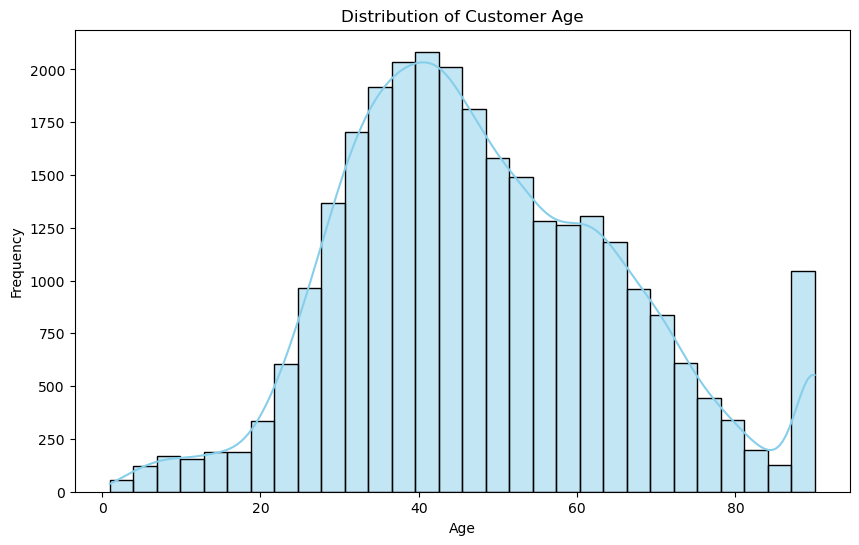

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(dataset['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

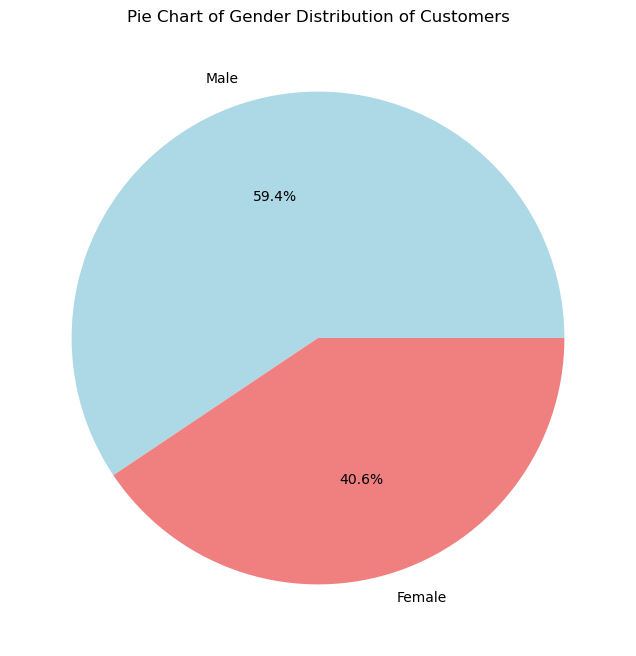

In [ ]:
plt.figure(figsize=(8, 8))
dataset['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Pie Chart of Gender Distribution of Customers')
plt.ylabel('')
plt.show()

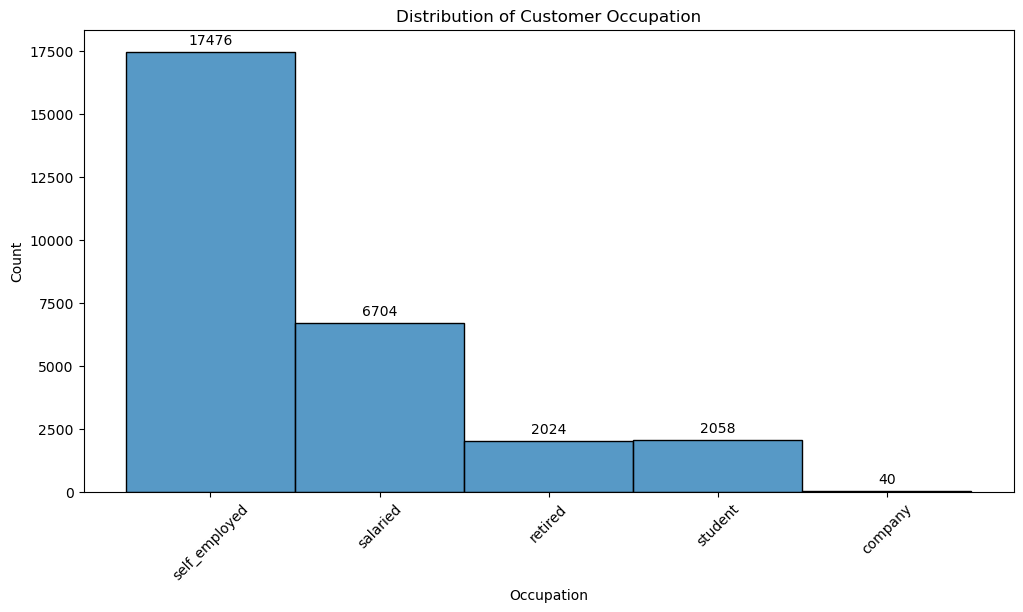

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the occupation distribution as a vertical histogram
plt.figure(figsize=(12, 6))
occupation_plot = sns.histplot(data=dataset, x='occupation', bins=len(dataset['occupation'].value_counts()), palette='Set3')

# Adding labels to each bar
for container in occupation_plot.containers:
    occupation_plot.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Distribution of Customer Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.show()

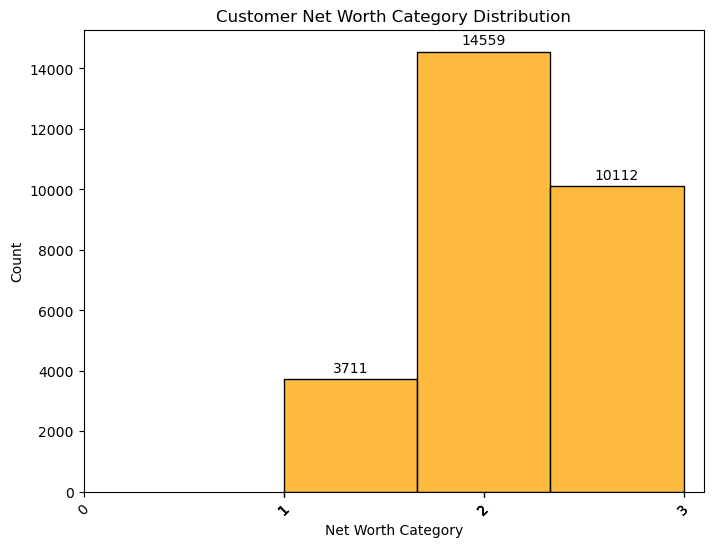

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the customer net worth category distribution as a histogram with orange color
plt.figure(figsize=(8, 6))
net_worth_plot = sns.histplot(data=dataset, x='customer_nw_category', bins=len(dataset['customer_nw_category'].value_counts()), color='orange')

# Adding labels to each bar
for container in net_worth_plot.containers:
    net_worth_plot.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Setting x-axis ticks to exclude 0
xticks = net_worth_plot.get_xticks()[net_worth_plot.get_xticks() > 0]
net_worth_plot.set_xticks(xticks.astype(int))

plt.title('Customer Net Worth Category Distribution')
plt.xlabel('Net Worth Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.show()

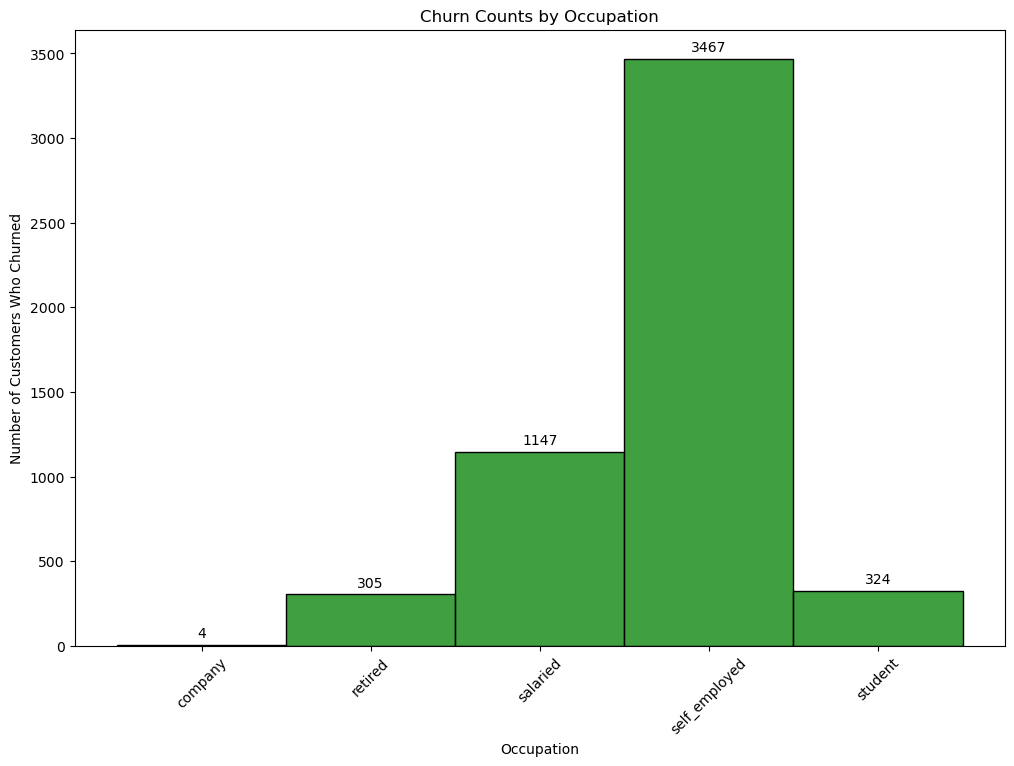

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the data to show only customers who churned (churn = 1)
occupation_churn_count = dataset[dataset['churn'] == 1].groupby('occupation').size().reset_index(name='count')

# Plotting the count of churn by occupation as a vertical histogram
plt.figure(figsize=(12, 8))
histplot = sns.histplot(data=occupation_churn_count, x='occupation', weights='count', bins=len(occupation_churn_count['occupation']), color='green', kde=False)

# Adding labels to each bar
for container in histplot.containers:
    histplot.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Churn Counts by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Customers Who Churned')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.show()

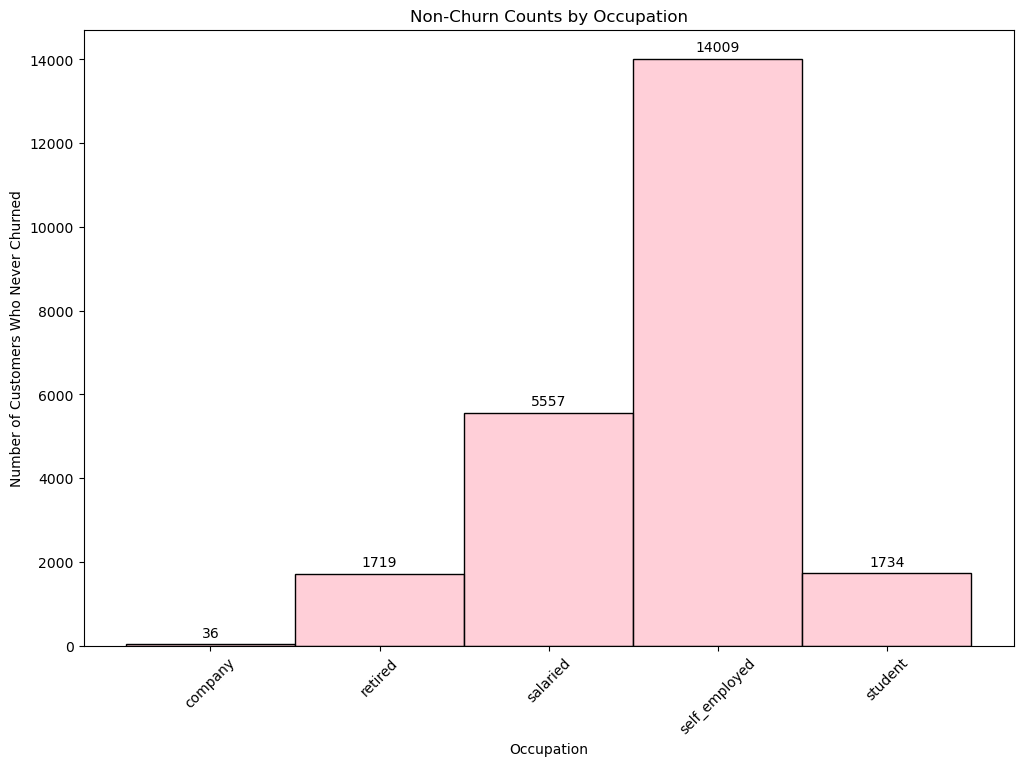

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the data to show only customers who never churned (churn = 0)
occupation_non_churn_count = dataset[dataset['churn'] == 0].groupby('occupation').size().reset_index(name='count')

# Plotting the count of non-churn by occupation as a vertical histogram
plt.figure(figsize=(12, 8))
histplot = sns.histplot(data=occupation_non_churn_count, x='occupation', weights='count', bins=len(occupation_non_churn_count['occupation']), color='pink', kde=False)

# Adding labels to each bar
for container in histplot.containers:
    histplot.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Non-Churn Counts by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Customers Who Never Churned')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.show()

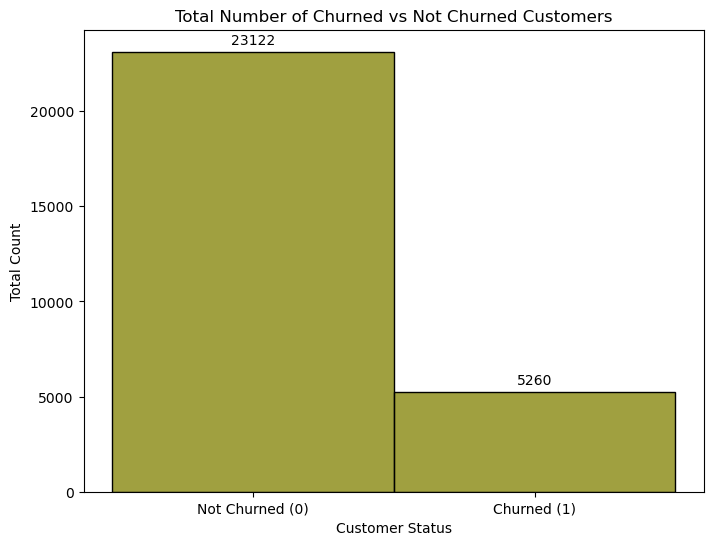

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the number of churned and non-churned customers
churn_counts = dataset['churn'].value_counts().reset_index()
churn_counts.columns = ['churn', 'count']

# Mapping churn values to labels for better readability
churn_counts['churn'] = churn_counts['churn'].map({0: 'Not Churned (0)', 1: 'Churned (1)'})

# Plotting the total number of churned vs non-churned customers as a vertical histogram
plt.figure(figsize=(8, 6))
churn_plot = sns.histplot(data=churn_counts, x='churn', weights='count', bins=len(churn_counts['churn']), color='olive', kde=False)

# Adding labels to each bar
for container in churn_plot.containers:
    churn_plot.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Total Number of Churned vs Not Churned Customers')
plt.xlabel('Customer Status')
plt.ylabel('Total Count')
plt.show()

## Data Preparation (Cleaning)

In [ ]:
# Dropping the 'customer_id' column
dataset = dataset.drop(columns=['customer_id'])

# Displaying the first few rows to confirm the column is dropped
print(dataset.head())

   vintage  age gender  dependents     occupation    city  \
0     2101   66   Male         0.0  self_employed   187.0   
1     2348   35   Male         0.0  self_employed     NaN   
2     2194   31   Male         0.0       salaried   146.0   
3     2329   90    NaN         NaN  self_employed  1020.0   
4     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  \
0                     2          755          1458.71   
1                     2         3214          5390.37   
2                     2           41          3913.16   
3                     2          582          2291.91   
4                     3          388           927.72   

   previous_month_end_balance  average_monthly_balance_prevQ  \
0                     1458.71                        1458.71   
1                     8704.66                        7799.26   
2                     5815.29                        4910.17   
3                     2291.91     

In [ ]:
# Convert 'last_transaction' to datetime
dataset['last_transaction'] = pd.to_datetime(dataset['last_transaction'], errors='coerce')

# Split into separate columns for day, month, and year
dataset['last_transaction_day'] = dataset['last_transaction'].dt.day.astype('Int64')
dataset['last_transaction_month'] = dataset['last_transaction'].dt.month.astype('Int64')
dataset['last_transaction_year'] = dataset['last_transaction'].dt.year.astype('Int64')

# Display the first few rows to check the new columns
print(dataset[['last_transaction_day', 'last_transaction_month', 'last_transaction_year']].head())

   last_transaction_day  last_transaction_month  last_transaction_year
0                    21                       5                   2019
1                     1                      11                   2019
2                  <NA>                    <NA>                   <NA>
3                     6                       8                   2019
4                     3                      11                   2019


In [ ]:
# Dropping the 'customer_id' column
dataset = dataset.drop(columns=['last_transaction'])

# Displaying the first few rows to confirm the column is dropped
print(dataset.head())

   vintage  age gender  dependents     occupation    city  \
0     2101   66   Male         0.0  self_employed   187.0   
1     2348   35   Male         0.0  self_employed     NaN   
2     2194   31   Male         0.0       salaried   146.0   
3     2329   90    NaN         NaN  self_employed  1020.0   
4     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  \
0                     2          755          1458.71   
1                     2         3214          5390.37   
2                     2           41          3913.16   
3                     2          582          2291.91   
4                     3          388           927.72   

   previous_month_end_balance  ...  current_month_credit  \
0                     1458.71  ...                  0.20   
1                     8704.66  ...                  0.56   
2                     5815.29  ...                  0.61   
3                     2291.91  ...                

In [ ]:
# finding number of missing values in every variable
dataset.isnull().sum().sort_values(ascending=False)

last_transaction_year             3223
last_transaction_month            3223
last_transaction_day              3223
dependents                        2463
city                               803
gender                             525
occupation                          80
previous_month_credit                0
churn                                0
previous_month_balance               0
current_month_balance                0
previous_month_debit                 0
current_month_debit                  0
vintage                              0
current_month_credit                 0
age                                  0
average_monthly_balance_prevQ        0
previous_month_end_balance           0
current_balance                      0
branch_code                          0
customer_nw_category                 0
average_monthly_balance_prevQ2       0
dtype: int64

In [ ]:
dataset['last_transaction_year'].fillna(dataset['last_transaction_year'].mode()[0], inplace=True)
dataset['last_transaction_month'].fillna(dataset['last_transaction_month'].mode()[0], inplace=True)
dataset['last_transaction_day'].fillna(dataset['last_transaction_day'].mode()[0], inplace=True)

In [ ]:
dataset['dependents'].fillna(dataset['dependents'].mode()[0], inplace=True)

In [ ]:
dataset['city'].fillna(dataset['city'].mode()[0], inplace=True)

In [ ]:
dataset['gender'].fillna(dataset['gender'].mode()[0], inplace=True)

In [ ]:
dataset['occupation'].fillna(dataset['occupation'].mode()[0], inplace=True)

In [ ]:
# finding number of missing values in every variable
dataset.isnull().sum().sort_values(ascending=False)

vintage                           0
age                               0
last_transaction_month            0
last_transaction_day              0
churn                             0
previous_month_balance            0
current_month_balance             0
previous_month_debit              0
current_month_debit               0
previous_month_credit             0
current_month_credit              0
average_monthly_balance_prevQ2    0
average_monthly_balance_prevQ     0
previous_month_end_balance        0
current_balance                   0
branch_code                       0
customer_nw_category              0
city                              0
occupation                        0
dependents                        0
gender                            0
last_transaction_year             0
dtype: int64

In [ ]:
# split gender and occupation to different columns
# Splitting the 'gender' column into two separate columns: 'is_male' and 'is_female'
dataset['is_male'] = (dataset['gender'] == 'Male').astype(int)
dataset['is_female'] = (dataset['gender'] == 'Female').astype(int)

In [ ]:
# Displaying the first few rows to check the new columns
print(dataset[['gender', 'is_male', 'is_female']].head(20))

    gender  is_male  is_female
0     Male        1          0
1     Male        1          0
2     Male        1          0
3     Male        1          0
4     Male        1          0
5   Female        0          1
6     Male        1          0
7     Male        1          0
8     Male        1          0
9     Male        1          0
10    Male        1          0
11    Male        1          0
12    Male        1          0
13    Male        1          0
14  Female        0          1
15  Female        0          1
16    Male        1          0
17  Female        0          1
18  Female        0          1
19  Female        0          1


In [ ]:
dataset = dataset.drop(columns=['gender'])

In [ ]:
dataset = pd.get_dummies(dataset, columns=['occupation'], prefix='occupation')

In [ ]:
# finding number of missing values in every variable
dataset.isnull().sum().sort_values(ascending=False)

vintage                           0
current_month_balance             0
occupation_self_employed          0
occupation_salaried               0
occupation_retired                0
occupation_company                0
is_female                         0
is_male                           0
last_transaction_year             0
last_transaction_month            0
last_transaction_day              0
churn                             0
previous_month_balance            0
previous_month_debit              0
age                               0
current_month_debit               0
previous_month_credit             0
current_month_credit              0
average_monthly_balance_prevQ2    0
average_monthly_balance_prevQ     0
previous_month_end_balance        0
current_balance                   0
branch_code                       0
customer_nw_category              0
city                              0
dependents                        0
occupation_student                0
dtype: int64

In [ ]:
# Convert boolean columns to integers
bool_columns = ['occupation_company', 'occupation_retired', 'occupation_salaried',
                'occupation_self_employed', 'occupation_student']
dataset[bool_columns] = dataset[bool_columns].astype(int)

# Convert Int64 columns to int64
int_columns = ['last_transaction_day', 'last_transaction_month', 'last_transaction_year']
dataset[int_columns] = dataset[int_columns].astype('int64')

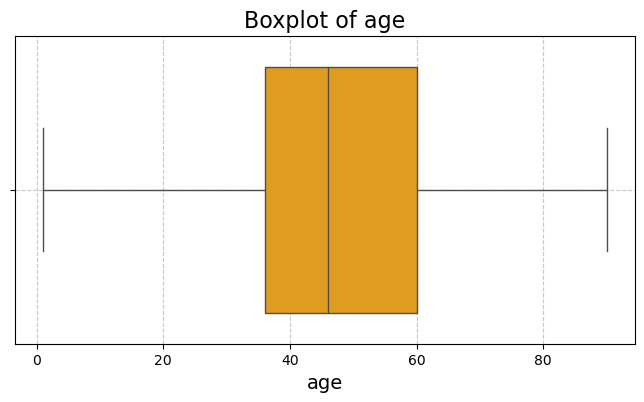

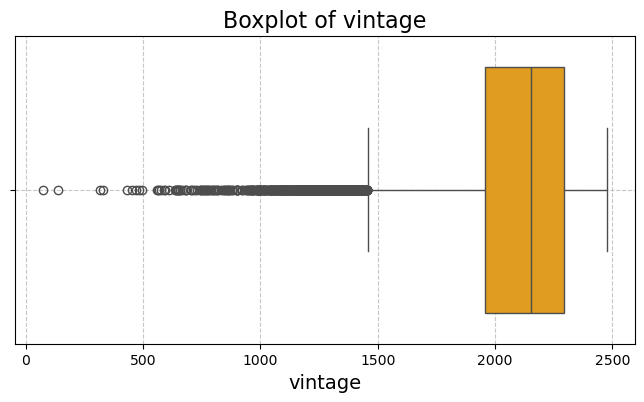

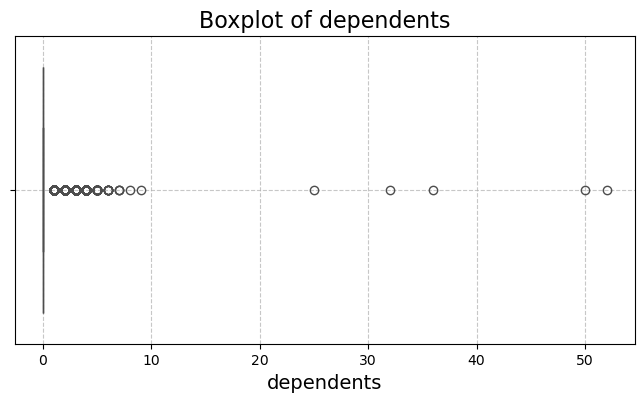

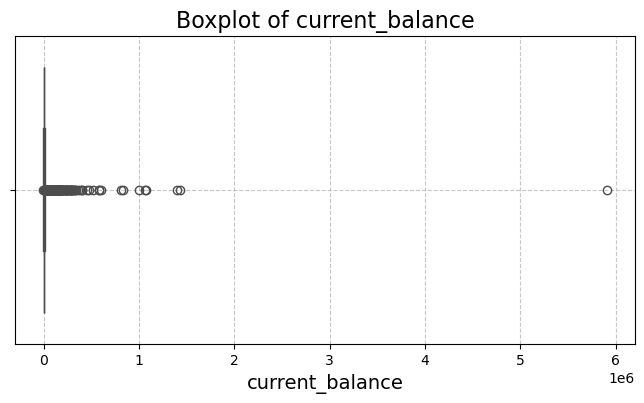

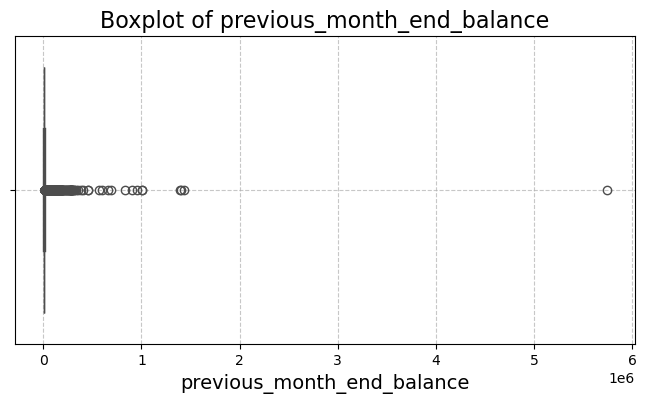

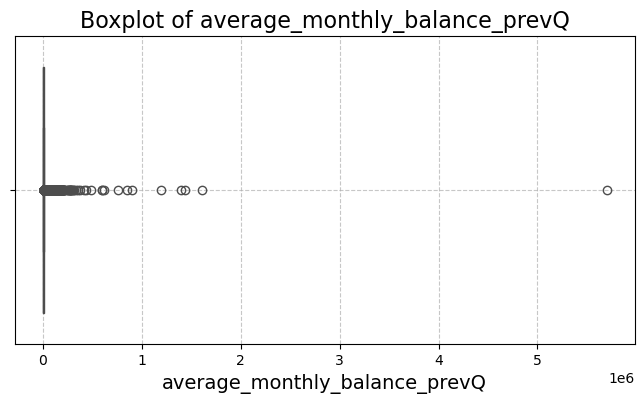

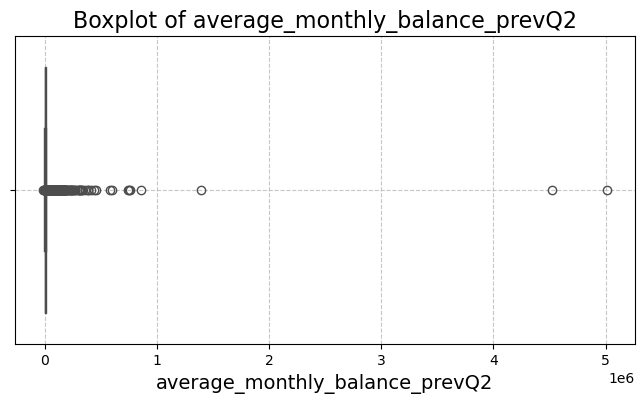

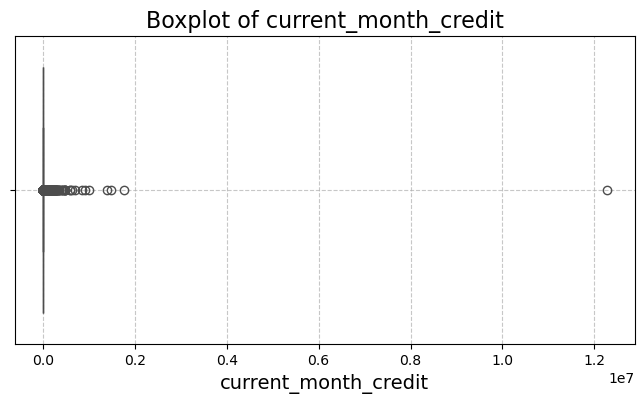

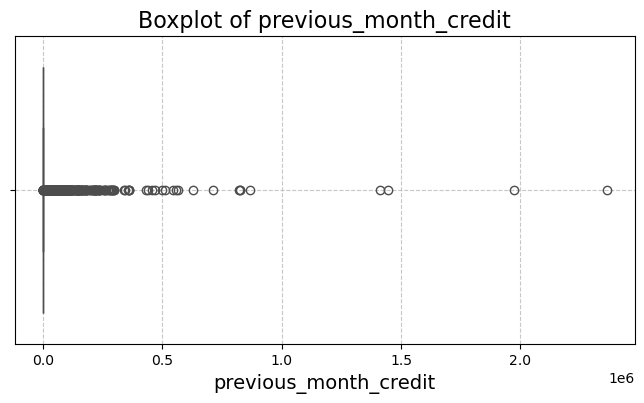

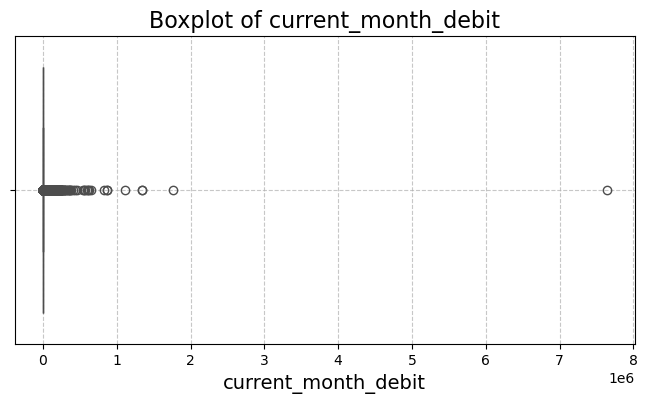

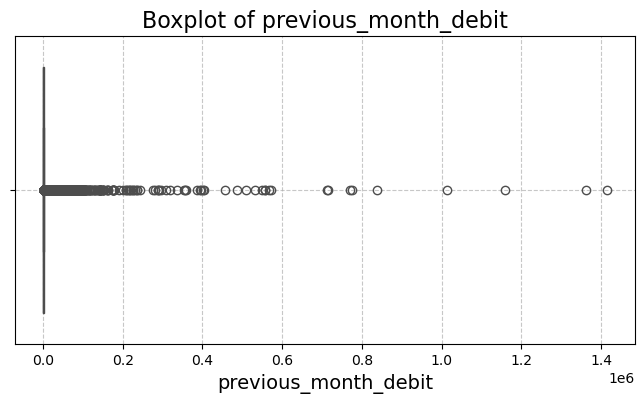

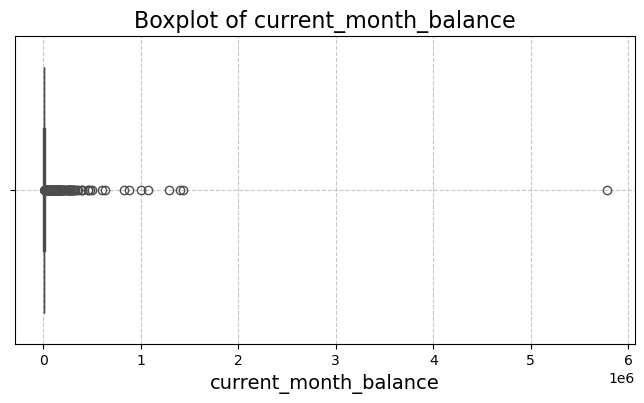

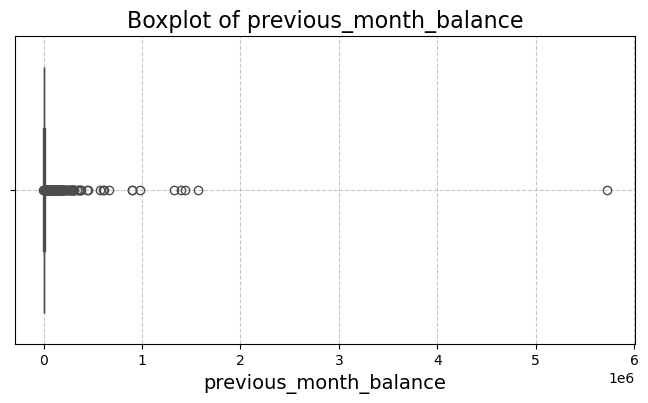

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check for outliers
columns_to_plot = [
    'age', 'vintage', 'dependents', 'current_balance', 'previous_month_end_balance',
    'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
    'current_month_credit', 'previous_month_credit', 'current_month_debit',
    'previous_month_debit', 'current_month_balance', 'previous_month_balance'
]

# Create individual boxplots for each numerical column
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[column], color='orange')
    plt.title(f'Boxplot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
# Vintage

## Remove extreme outliers using the IQR method

Q1 = dataset['vintage'].quantile(0.25)
Q3 = dataset['vintage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dataset = dataset[(dataset['vintage'] >= lower_bound) & (dataset['vintage'] <= upper_bound)]

In [ ]:
# Age

## Remove outliers if they are significantly outside the normal age range

Q1 = dataset['age'].quantile(0.25)
Q3 = dataset['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dataset = dataset[(dataset['age'] >= lower_bound) & (dataset['age'] <= upper_bound)]

In [ ]:
# Remove rows where the 'dependents' column has values greater than 10
dataset = dataset[dataset['dependents'] <= 10]

# Optionally, display the resulting unique values in the 'dependents' column
print(dataset['dependents'].describe())
print(dataset['dependents'].unique())

count    27432.000000
mean         0.310076
std          0.797093
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: dependents, dtype: float64
[0. 2. 3. 1. 7. 4. 6. 5. 9. 8.]


In [ ]:
# Current Balance, Previous Month End Balance, Average Monthly Balances, Credits, and Debits

# Method: These financial columns often have legitimate high-value outliers. Handle carefully:
# Remove outliers only if they are data entry errors or extreme anomalies.
# Consider keeping them if they represent important customer segments.

def remove_outliers(column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]

columns_to_check = [
    'current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ',
    'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit',
    'current_month_debit', 'previous_month_debit', 'current_month_balance', 'previous_month_balance'
]

for col in columns_to_check:
    dataset = remove_outliers(col)

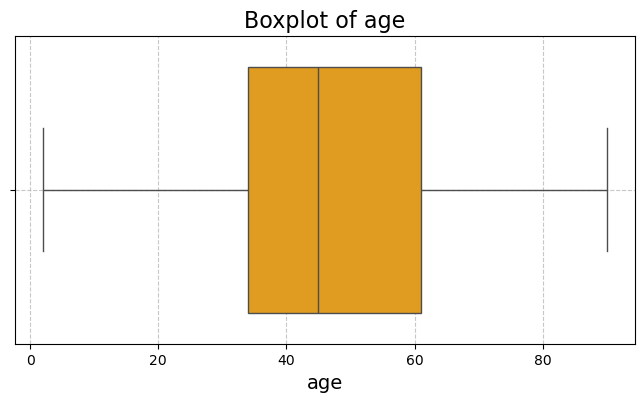

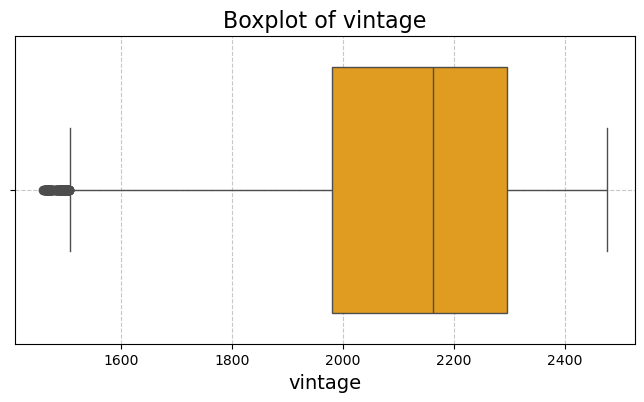

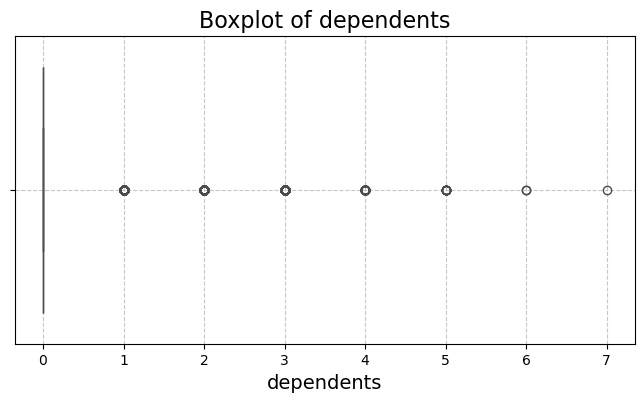

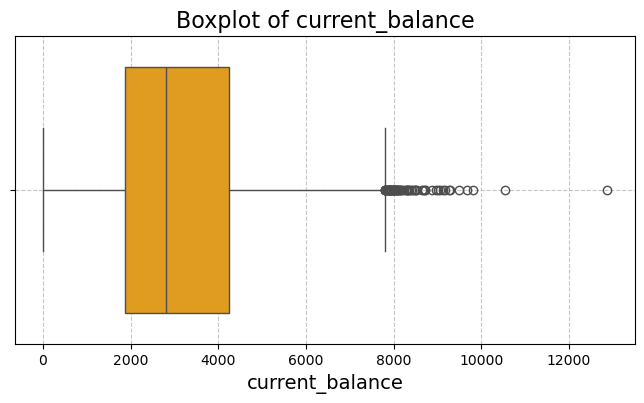

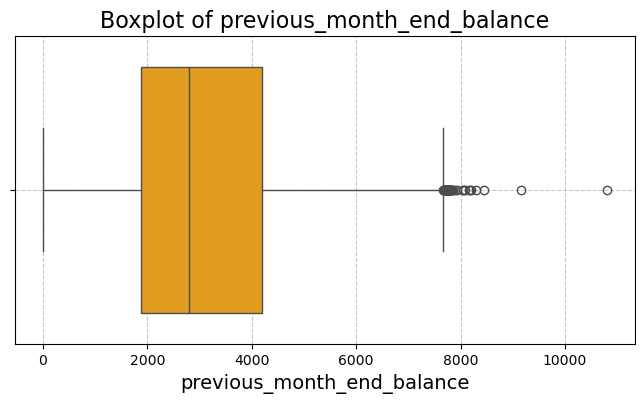

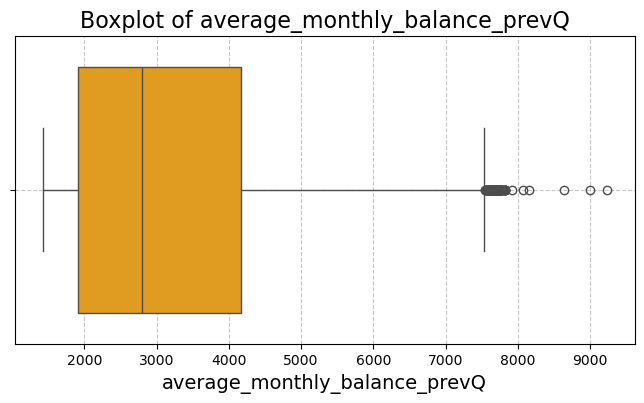

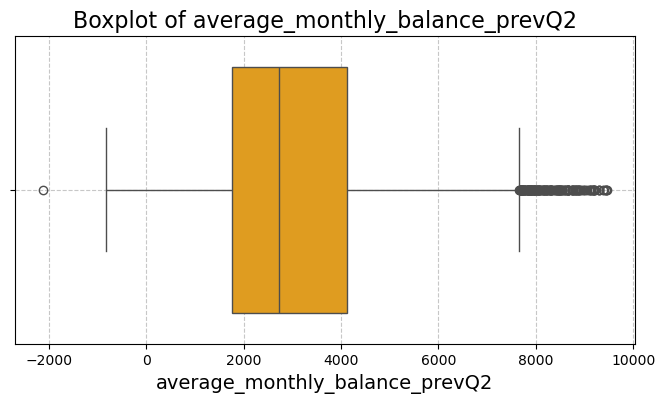

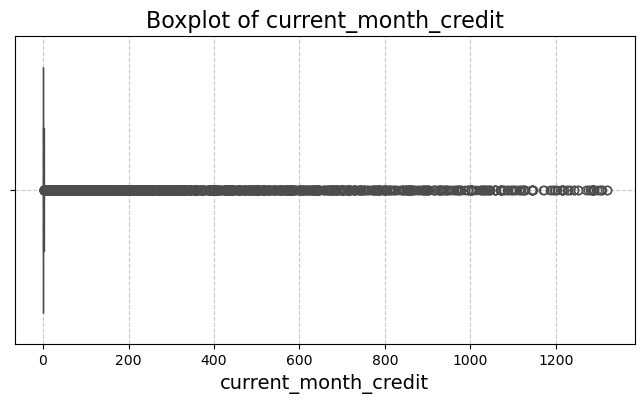

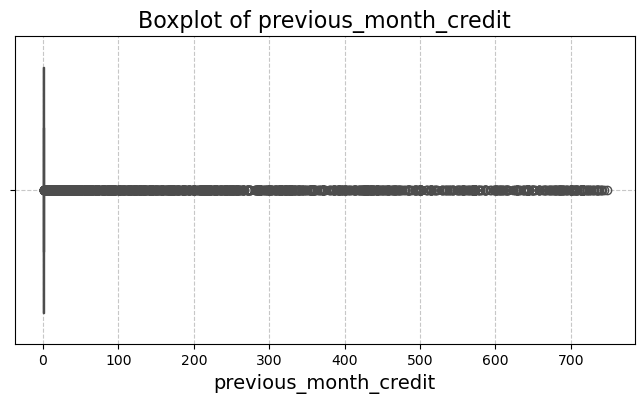

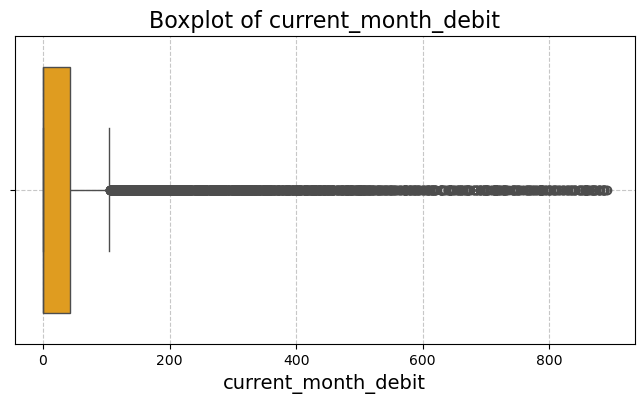

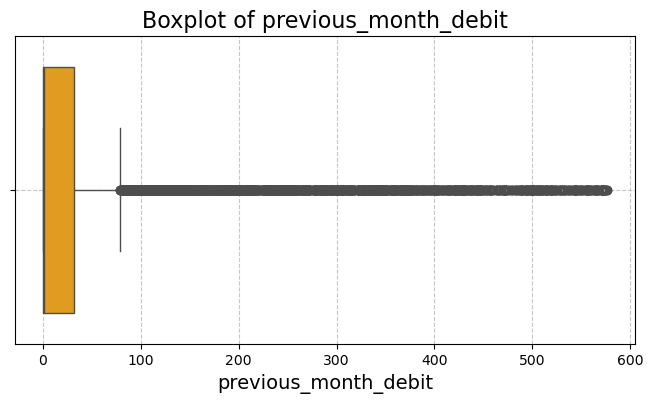

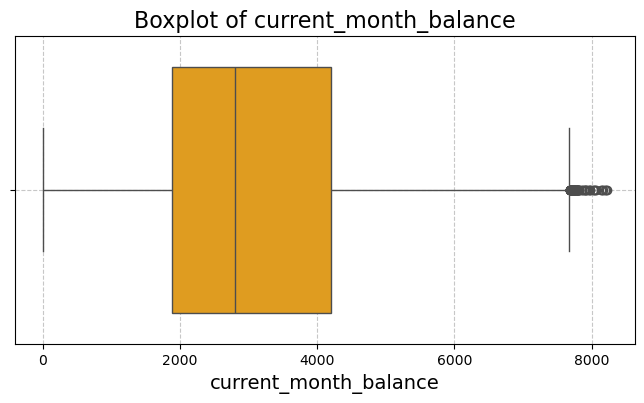

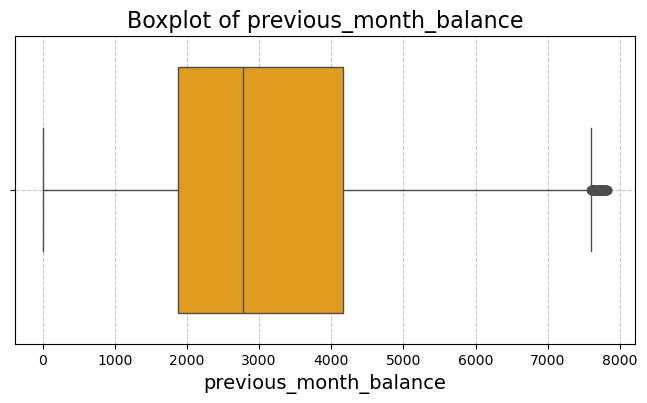

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check for outliers
columns_to_plot = [
    'age', 'vintage', 'dependents', 'current_balance', 'previous_month_end_balance',
    'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
    'current_month_credit', 'previous_month_credit', 'current_month_debit',
    'previous_month_debit', 'current_month_balance', 'previous_month_balance'
]

# Create individual boxplots for each numerical column
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[column], color='orange')
    plt.title(f'Boxplot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
# finding number of missing values in every variable
dataset.isnull().sum().sort_values(ascending=False)

vintage                           0
current_month_balance             0
occupation_self_employed          0
occupation_salaried               0
occupation_retired                0
occupation_company                0
is_female                         0
is_male                           0
last_transaction_year             0
last_transaction_month            0
last_transaction_day              0
churn                             0
previous_month_balance            0
previous_month_debit              0
age                               0
current_month_debit               0
previous_month_credit             0
current_month_credit              0
average_monthly_balance_prevQ2    0
average_monthly_balance_prevQ     0
previous_month_end_balance        0
current_balance                   0
branch_code                       0
customer_nw_category              0
city                              0
dependents                        0
occupation_student                0
dtype: int64

In [ ]:
dataset.shape

(10463, 27)

## Modeling & Evaluation

### Sharuk

In [ ]:
dataset.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,last_transaction_day,last_transaction_month,last_transaction_year,is_male,is_female,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,2101,66,0.0,187.0,2,755,1458.71,1458.71,1458.71,1449.07,...,21,5,2019,1,0,0,0,0,1,0
8,2053,31,0.0,1096.0,2,4110,1355.86,1355.86,1702.44,1126.13,...,12,12,2019,1,0,0,0,1,0,0
10,2389,68,0.0,409.0,3,709,1928.76,1571.47,1722.60,747.66,...,26,12,2019,1,0,0,1,0,0,0
15,1516,51,0.0,1232.0,3,149,2010.98,1994.84,1829.43,2415.57,...,31,12,2019,0,1,0,0,0,1,0
22,2105,41,0.0,905.0,2,1388,8358.47,7715.61,7819.06,7666.74,...,18,12,2019,0,1,0,0,0,1,0


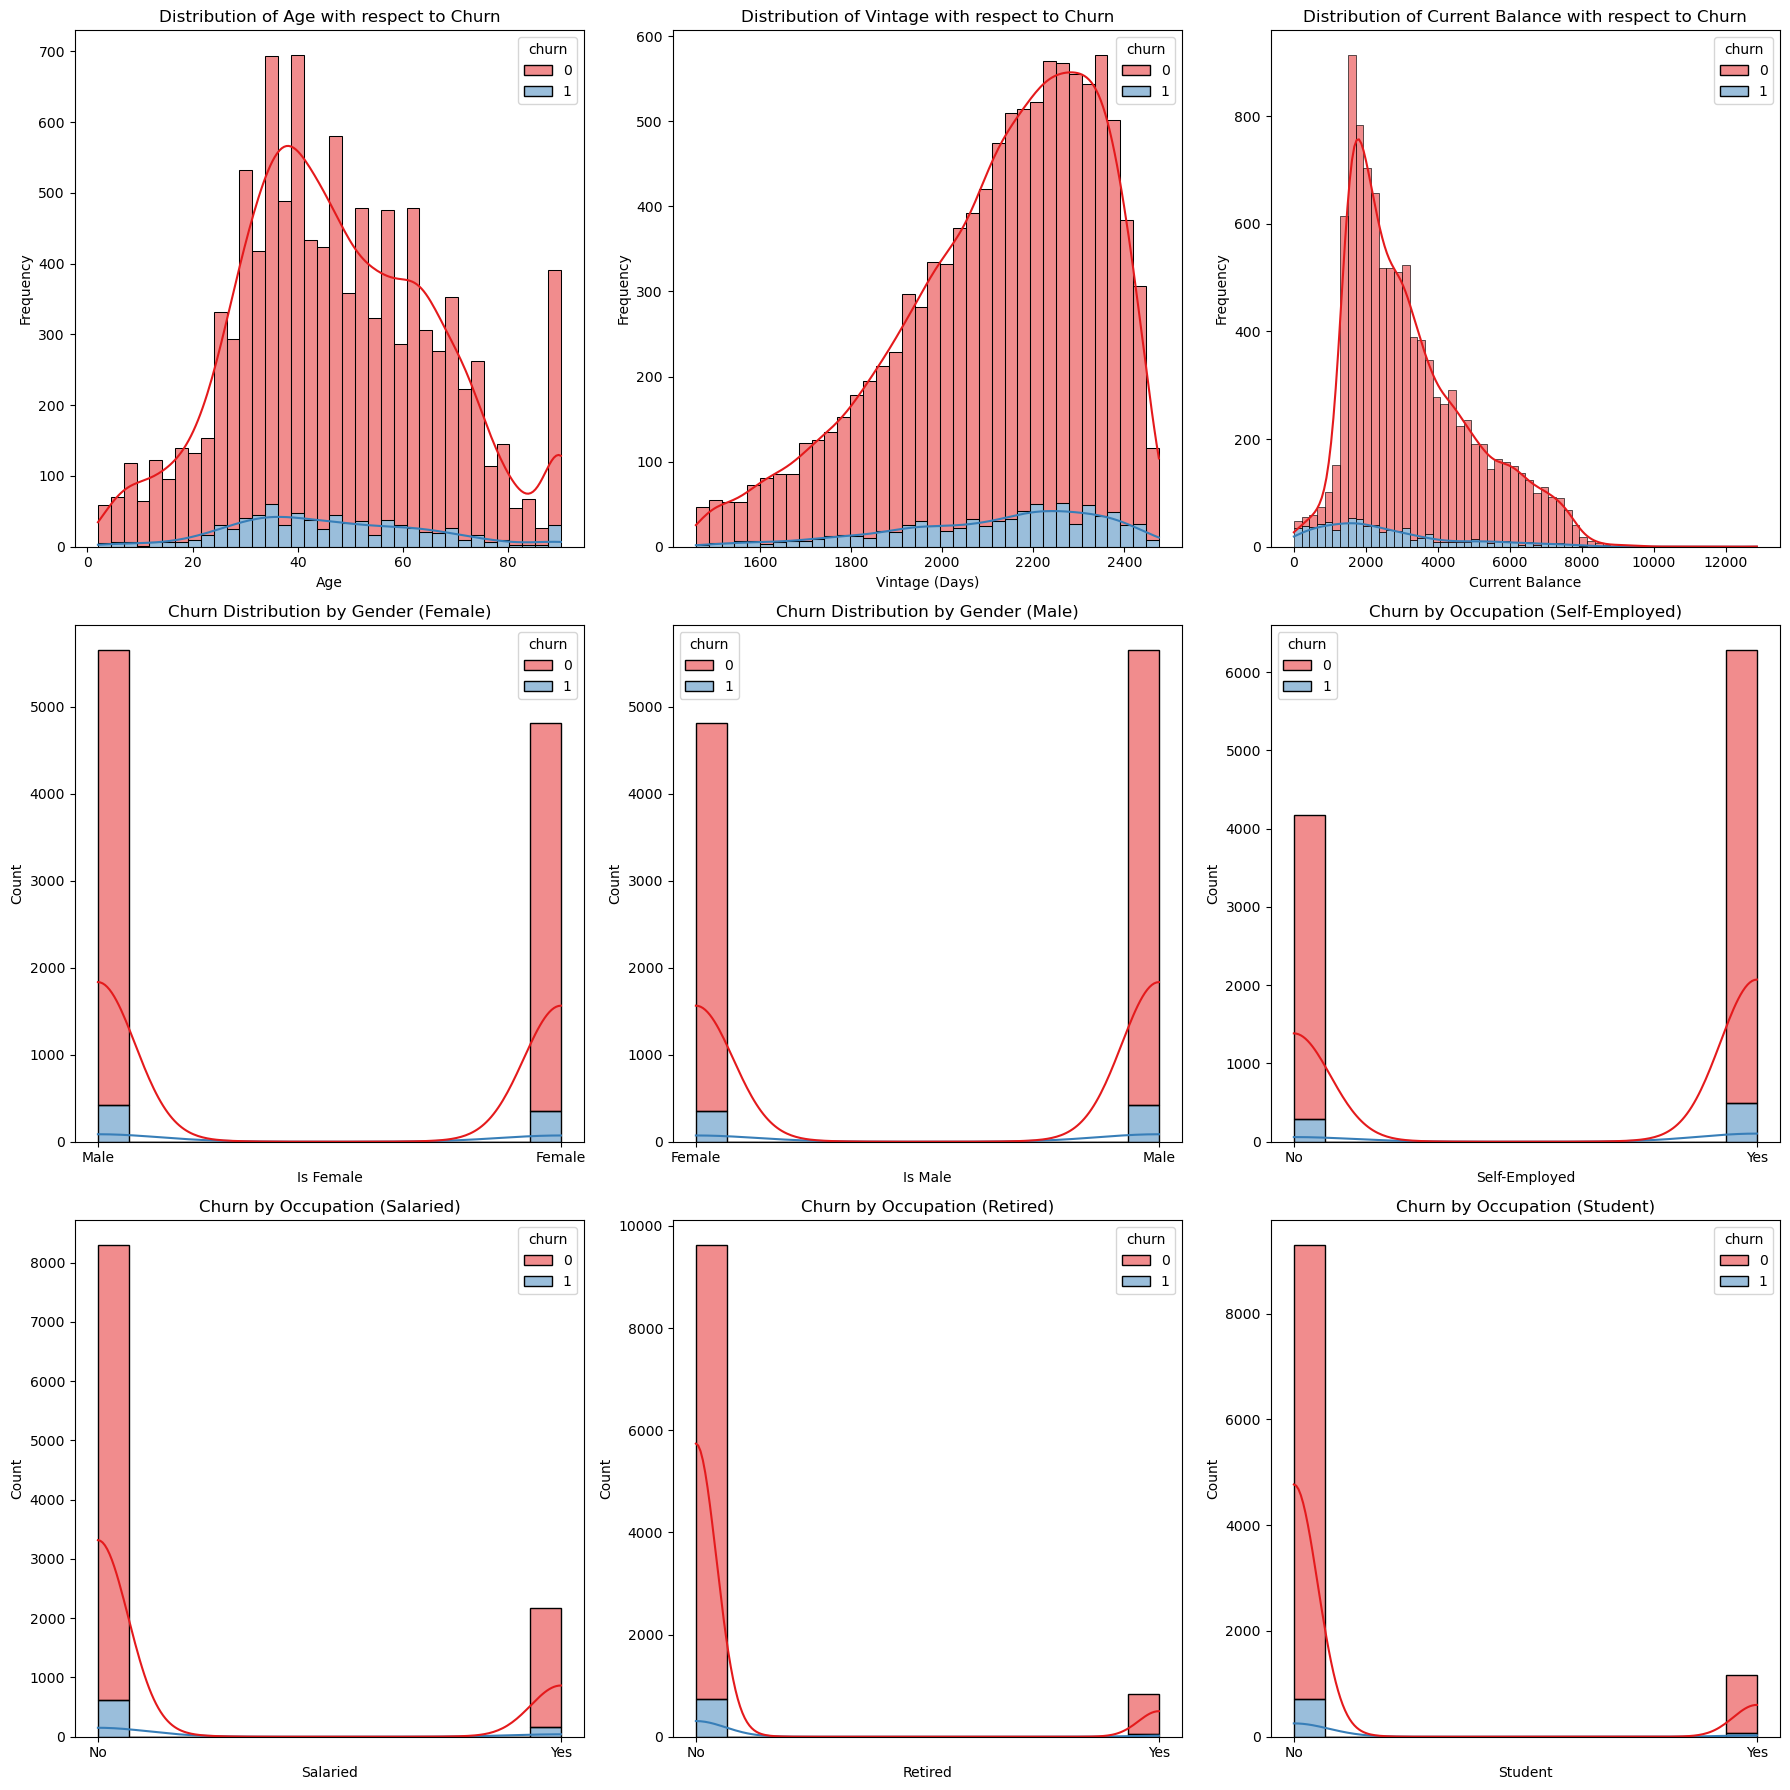

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# 1. Age Distribution with respect to Churn
sns.histplot(data=dataset, x='age', hue='churn', multiple='stack', kde=True, palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age with respect to Churn')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# 2. Vintage Distribution with respect to Churn
sns.histplot(data=dataset, x='vintage', hue='churn', multiple='stack', kde=True, palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Vintage with respect to Churn')
axes[0, 1].set_xlabel('Vintage (Days)')
axes[0, 1].set_ylabel('Frequency')

# 3. Current Balance Distribution with respect to Churn
sns.histplot(data=dataset, x='current_balance', hue='churn', multiple='stack', kde=True, palette='Set1', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Current Balance with respect to Churn')
axes[0, 2].set_xlabel('Current Balance')
axes[0, 2].set_ylabel('Frequency')

# 4. Churn by Gender (Female)
sns.histplot(data=dataset, x='is_female', hue='churn', multiple='stack', kde=True, palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('Churn Distribution by Gender (Female)')
axes[1, 0].set_xlabel('Is Female')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Male', 'Female'])

# 5. Churn by Gender (Male)
sns.histplot(data=dataset, x='is_male', hue='churn', multiple='stack', kde=True, palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title('Churn Distribution by Gender (Male)')
axes[1, 1].set_xlabel('Is Male')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Female', 'Male'])

# 6. Churn by Occupation (Self-Employed)
sns.histplot(data=dataset, x='occupation_self_employed', hue='churn', multiple='stack', kde=True, palette='Set1', ax=axes[1, 2])
axes[1, 2].set_title('Churn by Occupation (Self-Employed)')
axes[1, 2].set_xlabel('Self-Employed')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_xticks([0, 1])
axes[1, 2].set_xticklabels(['No', 'Yes'])

# 7. Churn by Occupation (Salaried)
sns.histplot(data=dataset, x='occupation_salaried', hue='churn', multiple='stack', kde=True, palette='Set1', ax=axes[2, 0])
axes[2, 0].set_title('Churn by Occupation (Salaried)')
axes[2, 0].set_xlabel('Salaried')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_xticks([0, 1])
axes[2, 0].set_xticklabels(['No', 'Yes'])

# 8. Churn by Occupation (Retired)
sns.histplot(data=dataset, x='occupation_retired', hue='churn', multiple='stack', kde=True, palette='Set1', ax=axes[2, 1])
axes[2, 1].set_title('Churn by Occupation (Retired)')
axes[2, 1].set_xlabel('Retired')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_xticklabels(['No', 'Yes'])

# 9. Churn by Occupation (Student)
sns.histplot(data=dataset, x='occupation_student', hue='churn', multiple='stack', kde=True, palette='Set1', ax=axes[2, 2])
axes[2, 2].set_title('Churn by Occupation (Student)')
axes[2, 2].set_xlabel('Student')
axes[2, 2].set_ylabel('Count')
axes[2, 2].set_xticks([0, 1])
axes[2, 2].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()



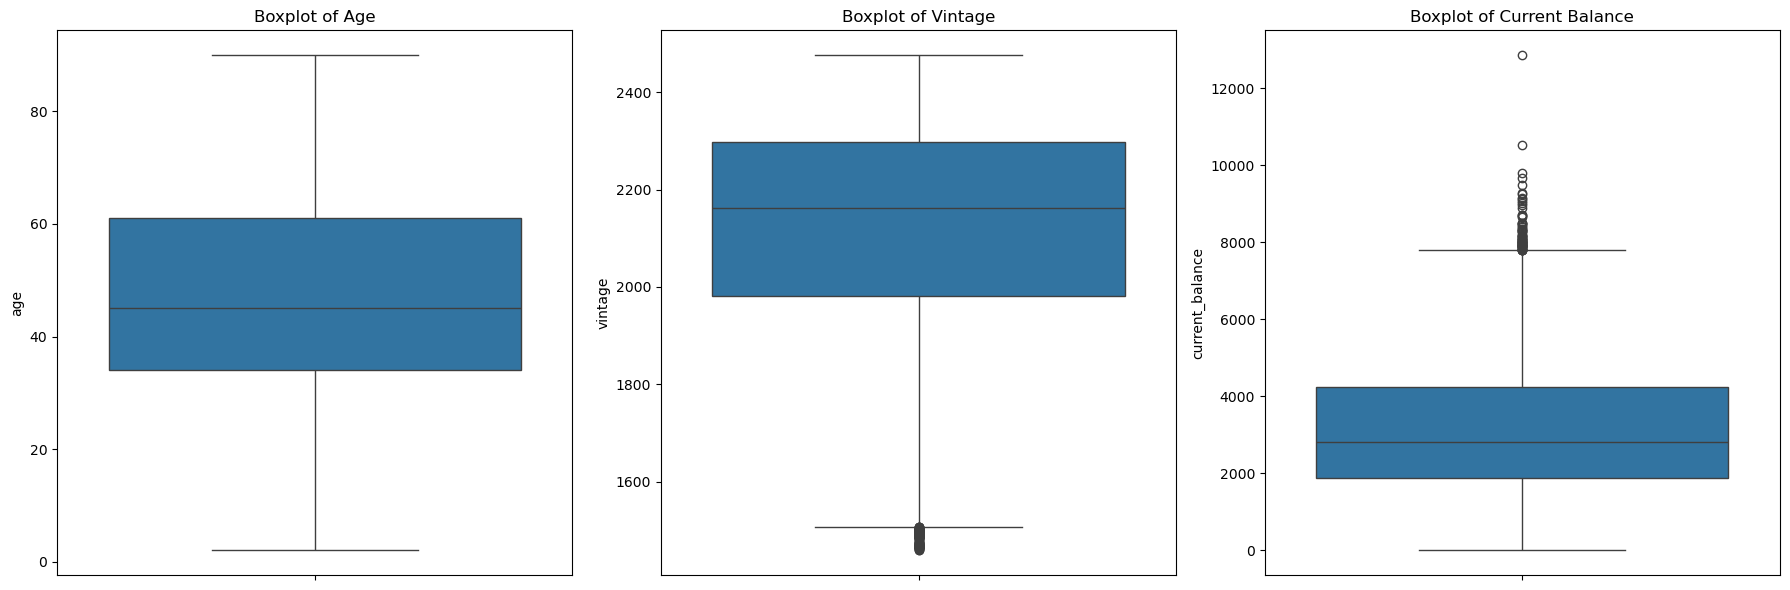

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous variables to visualize with boxplots
continuous_columns = ['age', 'vintage', 'current_balance']

# Create a 1x3 grid of subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Iterate through continuous columns and axes to plot each boxplot
for i, column in enumerate(continuous_columns):
    sns.boxplot(data=dataset, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column.replace("_", " ").title()}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


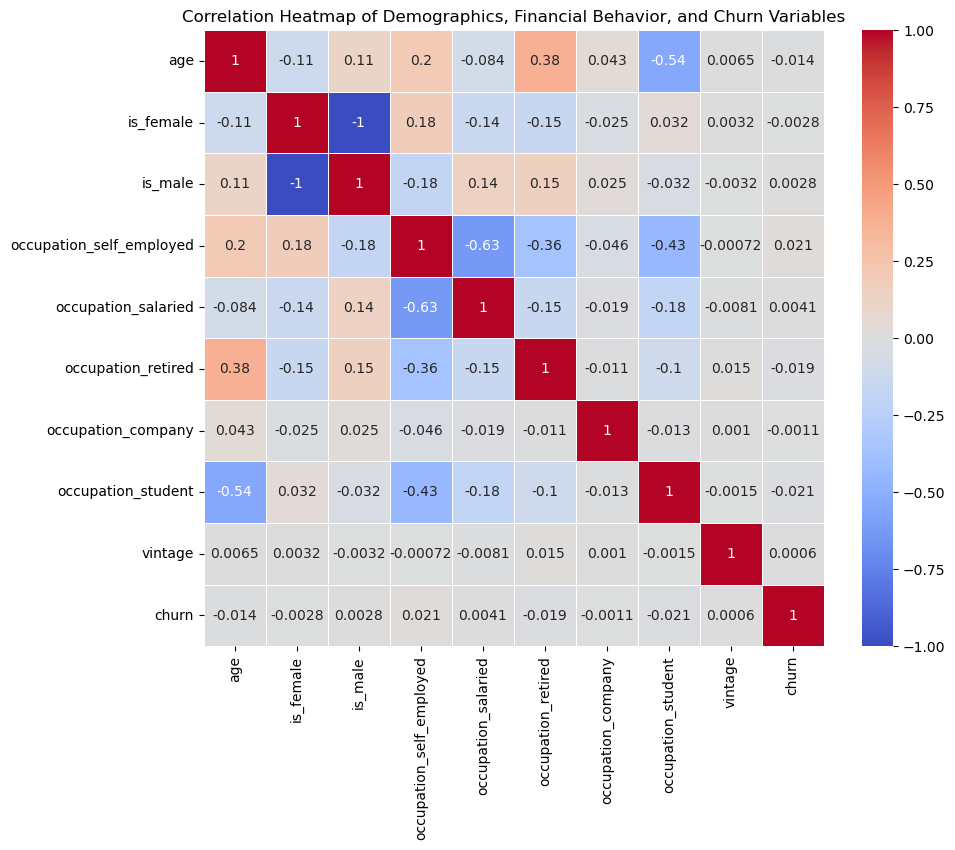

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for the correlation heatmap
columns_to_correlate = [
    'age', 'is_female', 'is_male', 'occupation_self_employed', 'occupation_salaried',
    'occupation_retired', 'occupation_company', 'occupation_student', 'vintage', 'churn'
]

# Calculating the correlation matrix
correlation_matrix = dataset[columns_to_correlate].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Demographics, Financial Behavior, and Churn Variables')
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Selecting multiple independent variables and the dependent variable
X_multivariate = dataset[['age', 'vintage', 'current_balance']]
y_multivariate = dataset['churn']

# Adding a constant to the model (intercept)
X_multivariate = sm.add_constant(X_multivariate)

# Fitting the multivariate regression model
multivariate_model = sm.OLS(y_multivariate, X_multivariate).fit()

# Displaying the model summary
print(multivariate_model.summary())



                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     55.00
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           2.89e-35
Time:                        18:04:07   Log-Likelihood:                -776.59
No. Observations:               10463   AIC:                             1561.
Df Residuals:                   10459   BIC:                             1590.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1379      0.025     

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8976

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2945
           1       0.92      0.87      0.89      2865

    accuracy                           0.90      5810
   macro avg       0.90      0.90      0.90      5810
weighted avg       0.90      0.90      0.90      5810



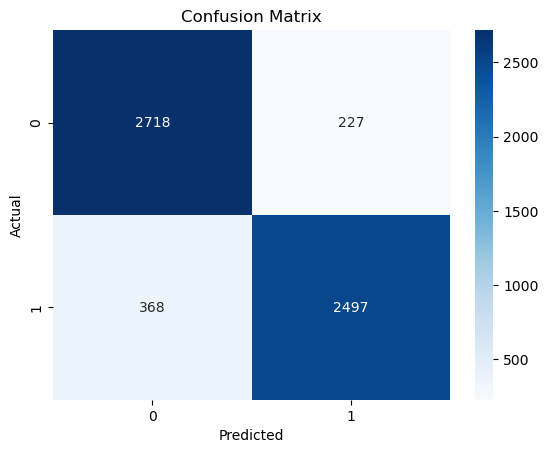

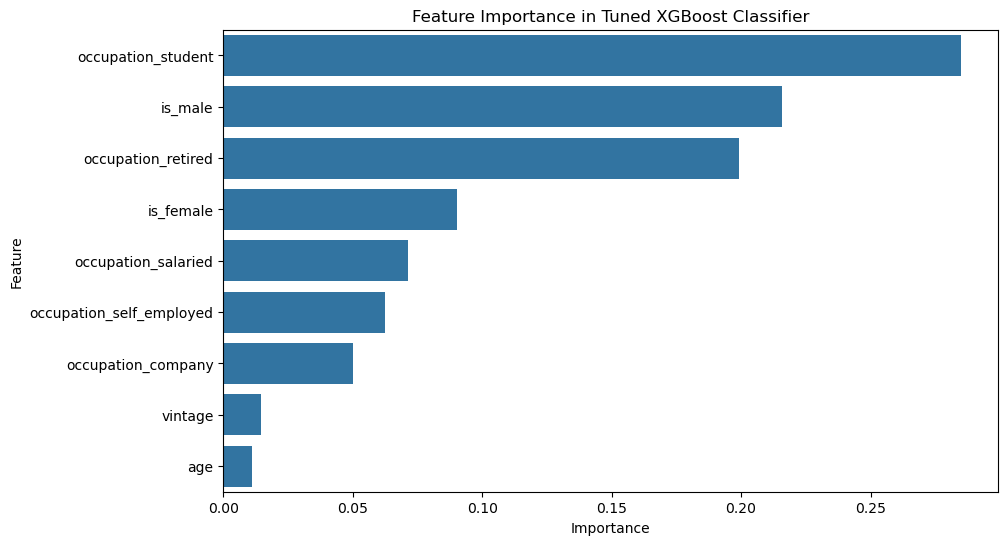

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns for the model (Objective 1)
X = dataset[['age', 'is_female', 'is_male', 'occupation_self_employed',
             'occupation_salaried', 'occupation_retired', 'occupation_company',
             'occupation_student', 'vintage']]
y = dataset['churn']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Defining the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initializing the XGBoost classifier
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Setting up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Using the best estimator to predict on the test set
best_xgb_clf = grid_search.best_estimator_
y_pred = best_xgb_clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
importances = best_xgb_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Tuned XGBoost Classifier')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Columns of interest for Objective 1: Analyzing Demographics and Customer Tenure
columns_of_interest = [
    'age', 'is_female', 'is_male', 'occupation_self_employed',
    'occupation_salaried', 'occupation_retired', 'occupation_company',
    'occupation_student', 'vintage'
]

# Assuming `dataset` is your DataFrame
dataset = dataset[columns_of_interest]

# Initialize the Dash app
app = dash.Dash(__name__)

# Set up the layout of the app with improved styling
app.layout = html.Div([
    html.H1("OLAP Dashboard for Demographics and Customer Tenure Distribution",
            style={'textAlign': 'center', 'color': '#003366', 'font-family': 'Arial'}),

    html.Div([
        html.Label("Select a Demographic or Tenure Metric:", style={'fontSize': 18, 'margin-right': '10px'}),
        dcc.Dropdown(
            id='column-dropdown',
            options=[{'label': col.replace('_', ' ').title(), 'value': col} for col in columns_of_interest],
            value='age',
            style={'width': '60%'}
        ),
    ], style={'display': 'flex', 'alignItems': 'center', 'justifyContent': 'center', 'padding': '20px', 'backgroundColor': '#f2f2f2', 'borderRadius': '5px', 'boxShadow': '2px 2px 10px #aaa'}),

    html.Div([
        dcc.Graph(id='histogram')
    ], style={'padding': '20px', 'backgroundColor': '#fff', 'borderRadius': '5px', 'boxShadow': '2px 2px 10px #aaa'})
], style={'maxWidth': '1000px', 'margin': 'auto', 'padding': '40px', 'backgroundColor': '#e6f7ff'})

# Callback to update histogram based on selected column
@app.callback(
    Output('histogram', 'figure'),
    [Input('column-dropdown', 'value')]
)
def update_histogram(selected_column):
    fig = px.histogram(
        dataset,
        x=selected_column,
        nbins=50,
        title=f'Distribution of {selected_column.replace("_", " ").title()}',
        template='plotly_white'
    )
    fig.update_layout(
        title={'x': 0.5, 'xanchor': 'center', 'font': {'size': 24}},
        xaxis_title=selected_column.replace('_', ' ').title(),
        yaxis_title='Frequency',
        bargap=0.1,
        plot_bgcolor='#f2f2f2',
        hovermode='x unified',
        xaxis=dict(tickformat='',  # Disable shortening of numeric values
                   tickprefix='',  # Remove any prefixes
                   ticksuffix='')  # Remove any suffixes
    )
    fig.update_traces(marker_color='#003366', opacity=0.75)
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


### Vicky

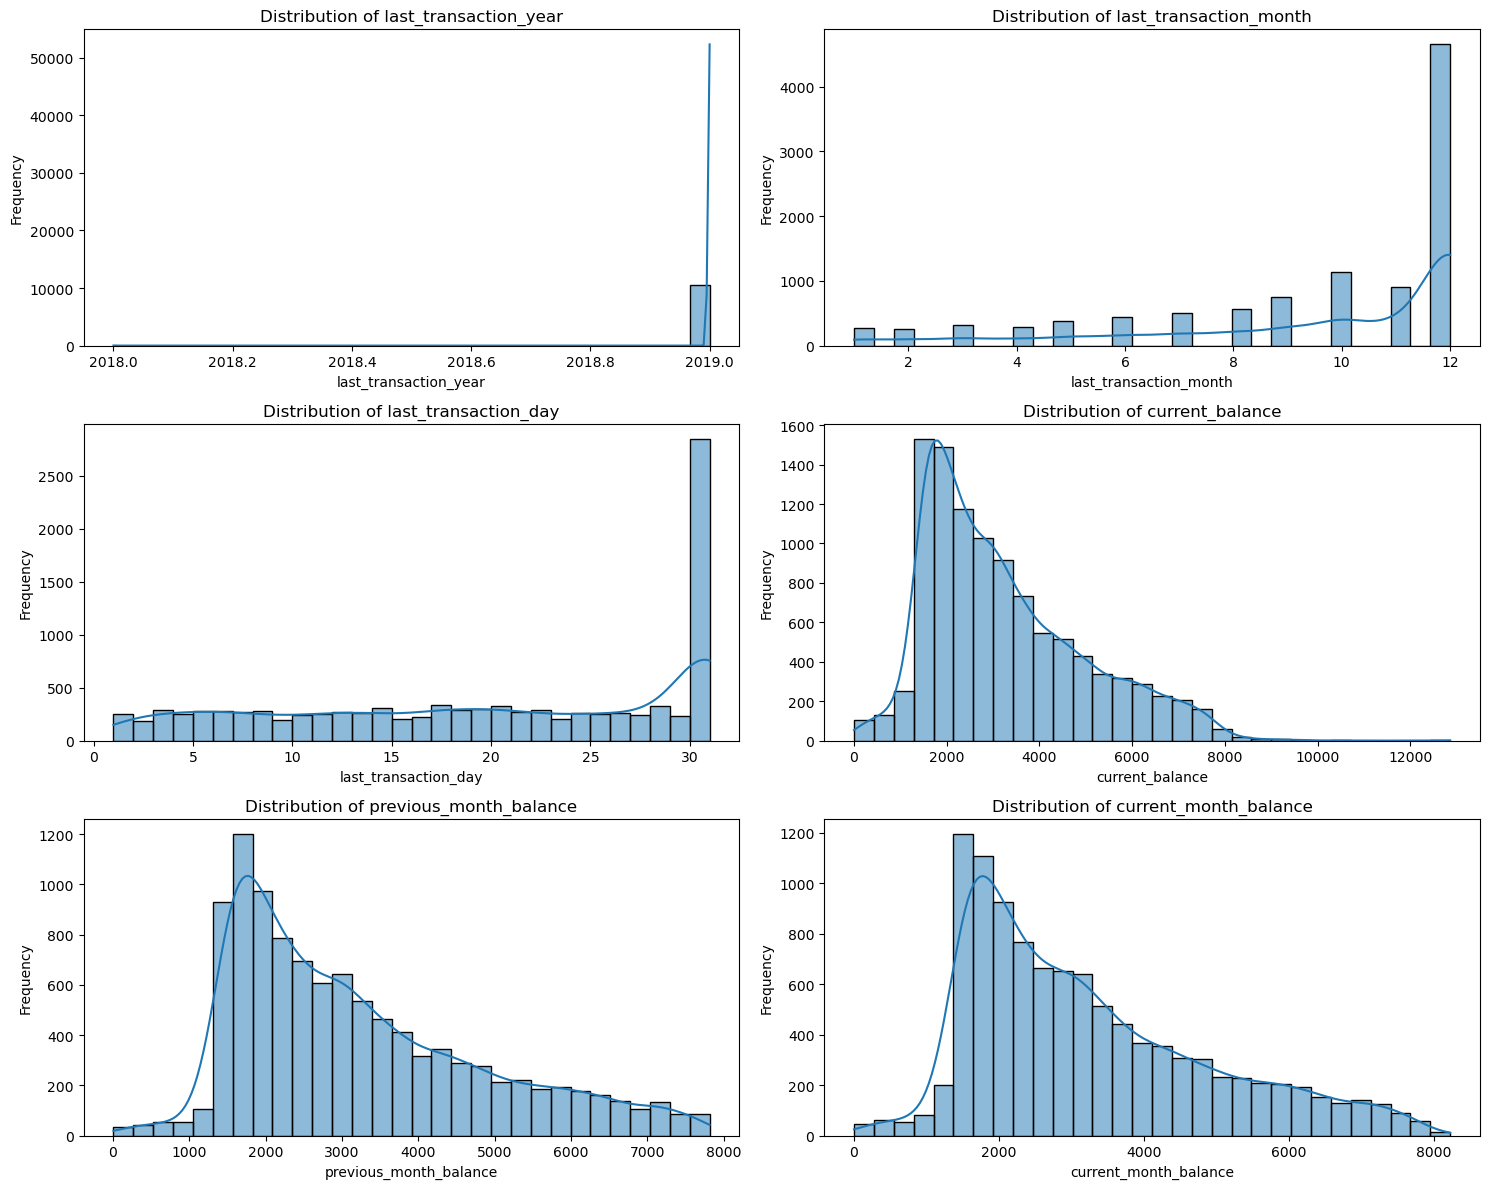

In [ ]:
### start your code here

import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to create histograms for
columns_to_plot = [
    'last_transaction_year', 'last_transaction_month', 'last_transaction_day',
    'current_balance', 'previous_month_balance', 'current_month_balance'
]

# Creating subplots
plt.figure(figsize=(15, 12))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns for the grid
    sns.histplot(dataset[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


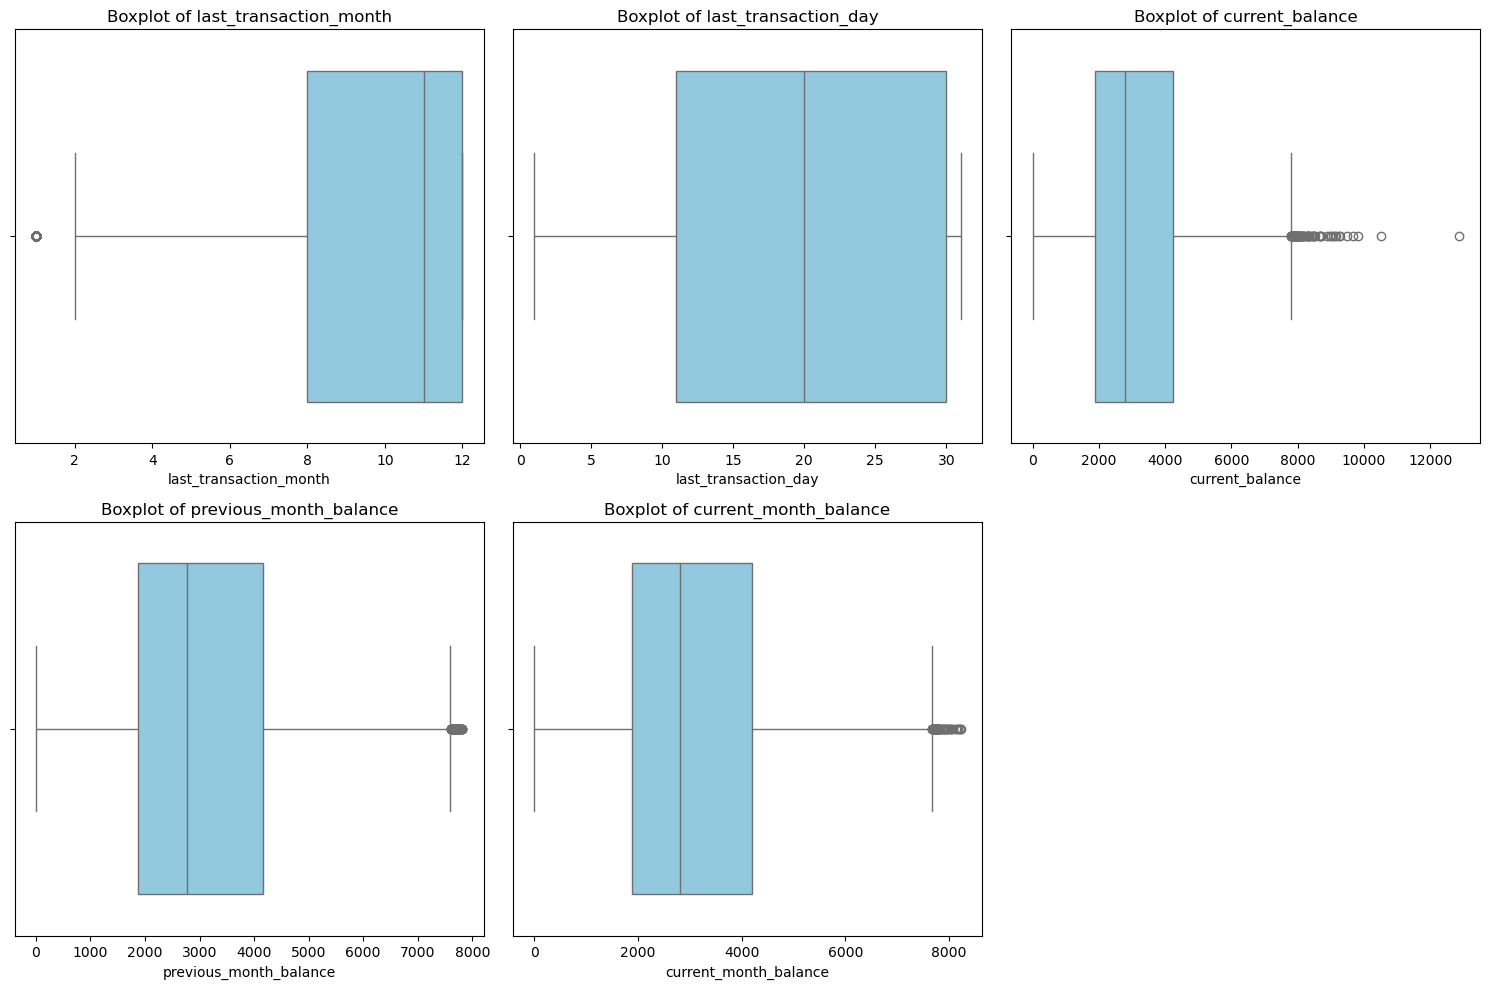

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to create boxplots for
columns_to_plot = [
    'last_transaction_month', 'last_transaction_day',
    'current_balance', 'previous_month_balance', 'current_month_balance'
]

# Creating subplots
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns for the grid
    sns.boxplot(x=dataset[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



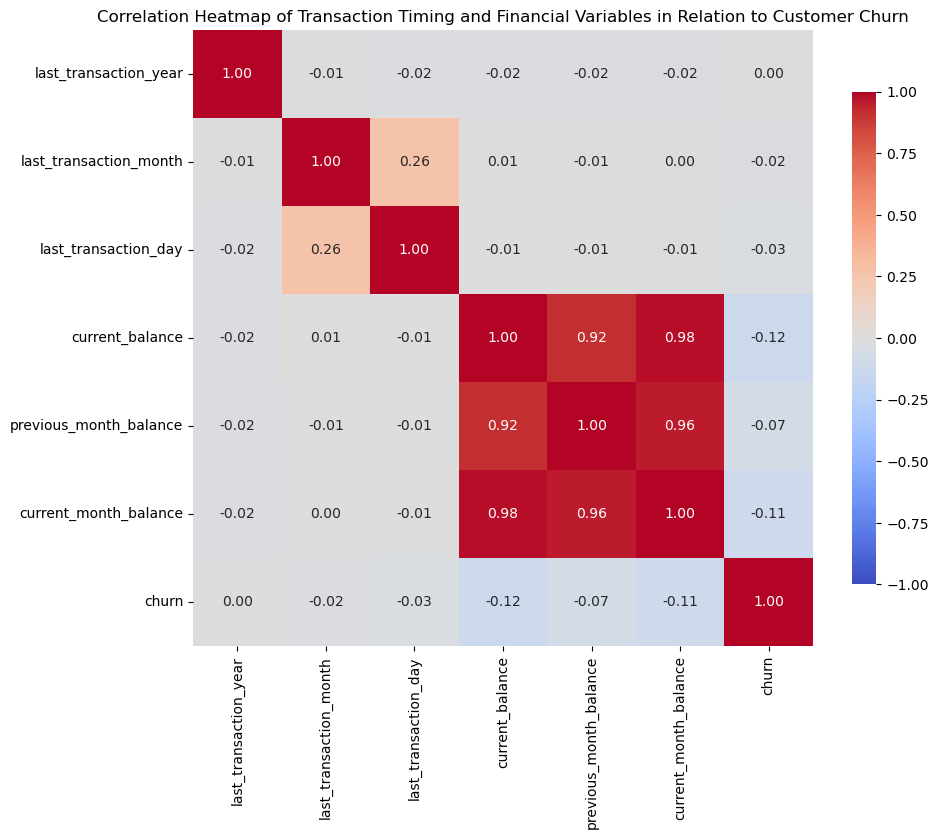

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame

# Selecting the relevant columns for the correlation analysis
columns_of_interest = [
    'last_transaction_year', 'last_transaction_month', 'last_transaction_day',
    'current_balance', 'previous_month_balance',
    'current_month_balance', 'churn'
]

# Computing the correlation matrix
correlation_matrix = dataset[columns_of_interest].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Transaction Timing and Financial Variables in Relation to Customer Churn')
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Ensure all relevant columns are numeric
columns_of_interest = [
    'last_transaction_year', 'last_transaction_month', 'last_transaction_day',
    'current_balance', 'previous_month_balance', 'current_month_balance',
    'current_month_debit', 'previous_month_credit', 'average_monthly_balance_prevQ'
]

# Convert all selected columns to numeric, coercing errors to NaN
dataset[columns_of_interest] = dataset[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
dataset = dataset.dropna()

# Independent variables (X) and dependent variable (y)
X_multivariate = dataset[columns_of_interest]
y_multivariate = dataset['churn']

# Adding a constant to the model (intercept)
X_multivariate = sm.add_constant(X_multivariate)

# Fitting the multivariate regression model
multivariate_model = sm.OLS(y_multivariate, X_multivariate).fit()

# Displaying the model summary
print(multivariate_model.summary())



                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     92.90
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          2.18e-167
Time:                        18:16:12   Log-Likelihood:                -455.93
No. Observations:               10463   AIC:                             931.9
Df Residuals:                   10453   BIC:                             1004.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9325
Precision: 0.6023

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2909
           1       0.60      0.23      0.33       230

    accuracy                           0.93      3139
   macro avg       0.77      0.61      0.65      3139
weighted avg       0.92      0.93      0.92      3139



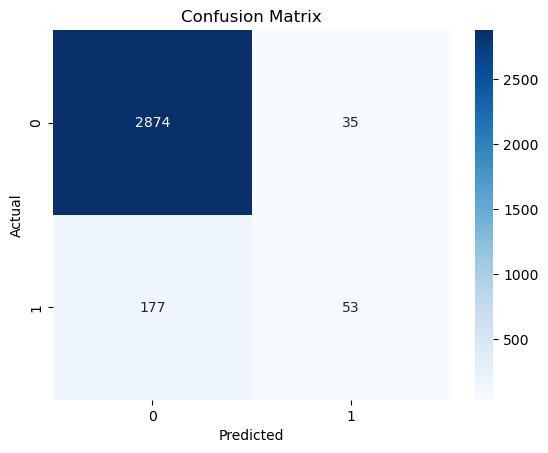

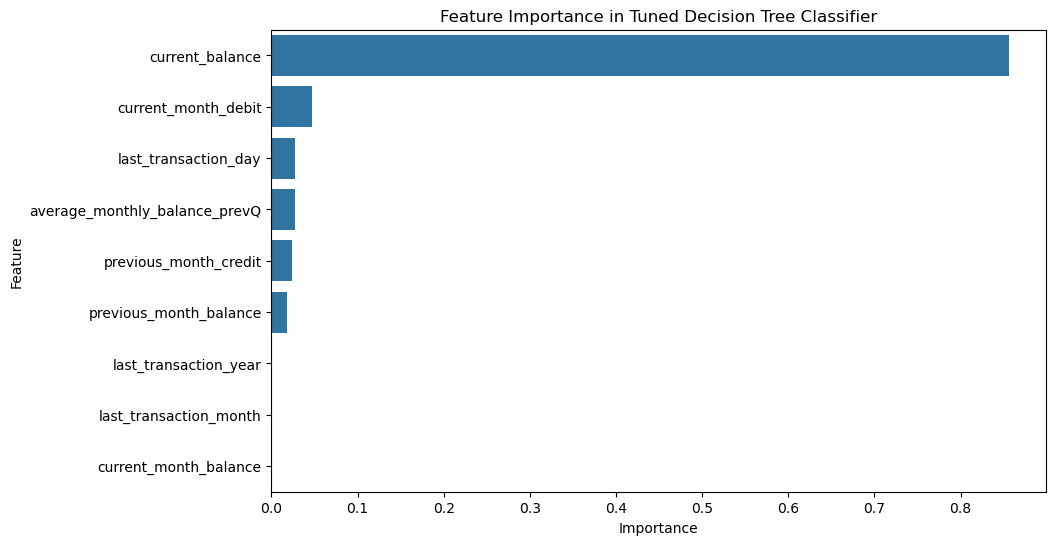

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the relevant columns for the model
X = dataset[['last_transaction_year', 'last_transaction_month', 'last_transaction_day',
             'current_balance', 'previous_month_balance', 'current_month_balance',
             'current_month_debit', 'previous_month_credit', 'average_monthly_balance_prevQ']]
y = dataset['churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Using the best estimator to predict on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')

# Displaying the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
importances = best_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Tuned Decision Tree Classifier')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Columns of interest for Objective 3: Temporal Analysis of Customer Transactions
columns_of_interest = [
    'last_transaction_year', 'last_transaction_month', 'last_transaction_day',
    'current_balance', 'previous_month_balance', 'current_month_balance',
    'current_month_debit', 'previous_month_credit', 'average_monthly_balance_prevQ'
]

# Assuming `dataset` is your DataFrame
dataset = dataset[columns_of_interest]

# Initialize the Dash app
app = dash.Dash(__name__)

# Set up the layout of the app with improved styling
app.layout = html.Div([
    html.H1("OLAP Dashboard for Transaction Timing and Financial Metrics Distribution",
            style={'textAlign': 'center', 'color': '#003366', 'font-family': 'Arial'}),

    html.Div([
        html.Label("Select a Transaction or Financial Metric:", style={'fontSize': 18, 'margin-right': '10px'}),
        dcc.Dropdown(
            id='column-dropdown',
            options=[{'label': col.replace('_', ' ').title(), 'value': col} for col in columns_of_interest],
            value='last_transaction_year',
            style={'width': '60%'}
        ),
    ], style={'display': 'flex', 'alignItems': 'center', 'justifyContent': 'center', 'padding': '20px', 'backgroundColor': '#f2f2f2', 'borderRadius': '5px', 'boxShadow': '2px 2px 10px #aaa'}),

    html.Div([
        dcc.Graph(id='histogram')
    ], style={'padding': '20px', 'backgroundColor': '#fff', 'borderRadius': '5px', 'boxShadow': '2px 2px 10px #aaa'})
], style={'maxWidth': '1000px', 'margin': 'auto', 'padding': '40px', 'backgroundColor': '#e6f7ff'})

# Callback to update histogram based on selected column
@app.callback(
    Output('histogram', 'figure'),
    [Input('column-dropdown', 'value')]
)
def update_histogram(selected_column):
    fig = px.histogram(
        dataset,
        x=selected_column,
        nbins=50,
        title=f'Distribution of {selected_column.replace("_", " ").title()}',
        template='plotly_white'
    )
    fig.update_layout(
        title={'x': 0.5, 'xanchor': 'center', 'font': {'size': 24}},
        xaxis_title=selected_column.replace('_', ' ').title(),
        yaxis_title='Frequency',
        bargap=0.1,
        plot_bgcolor='#f2f2f2',
        hovermode='x unified',
        xaxis=dict(tickformat='',  # Disable shortening of numeric values
                   tickprefix='',  # Remove any prefixes
                   ticksuffix='')  # Remove any suffixes
    )
    fig.update_traces(marker_color='#008080', opacity=0.75)  # Change the color to teal
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
